<a href="https://colab.research.google.com/github/tharusha20241825-afk/MLCW/blob/main/Tharusha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [ ]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [ ]:
# LOAD DATA
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

print("=" * 60)
print("EXPLORATORY DATA ANALYSIS - TELCO CUSTOMER CHURN")
print("=" * 60)

EXPLORATORY DATA ANALYSIS - TELCO CUSTOMER CHURN


In [ ]:
# 1. BASIC DATASET INFORMATION
print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
df.info()


1. DATASET OVERVIEW
----------------------------------------
Shape: 7043 rows × 21 columns
Memory usage: 6.82 MB

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4         

In [ ]:
# 2. CHECK FOR MISSING VALUES AND DUPLICATES
print("\n\n2. DATA QUALITY CHECK")
print("-" * 40)

# Missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")

# Check TotalCharges specifically (known issue - blank strings)
print("\nChecking 'TotalCharges' column:")
print(f"Data type: {df['TotalCharges'].dtype}")
print(f"Unique sample values: {df['TotalCharges'].unique()[:5]}")

# Find empty strings in TotalCharges
blank_totalcharges = df[df['TotalCharges'].str.strip() == ''].shape[0]
print(f"Rows with blank TotalCharges: {blank_totalcharges}")

# Convert TotalCharges to numeric, handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with median
median_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_charges)
print(f"Filled {df['TotalCharges'].isnull().sum()} missing values with median: {median_charges:.2f}")

# Check duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Drop customerID (not useful for modeling)
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])
    print("Dropped 'customerID' column")



2. DATA QUALITY CHECK
----------------------------------------
Missing values per column:
No missing values found

Checking 'TotalCharges' column:
Data type: object
Unique sample values: ['29.85' '1889.5' '108.15' '1840.75' '151.65']
Rows with blank TotalCharges: 11
Filled 0 missing values with median: 1397.47

Duplicate rows: 0
Dropped 'customerID' column




3. TARGET VARIABLE: CHURN
----------------------------------------
Churn distribution:
  Not Churned (No): 5,174 customers (73.5%)
  Churned (Yes): 1,869 customers (26.5%)


/tmp/ipython-input-1797875510.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, ax=axes[0], palette=['#3498db', '#e74c3c'])
/tmp/ipython-input-1797875510.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Not Churned (0)', 'Churned (1)'])


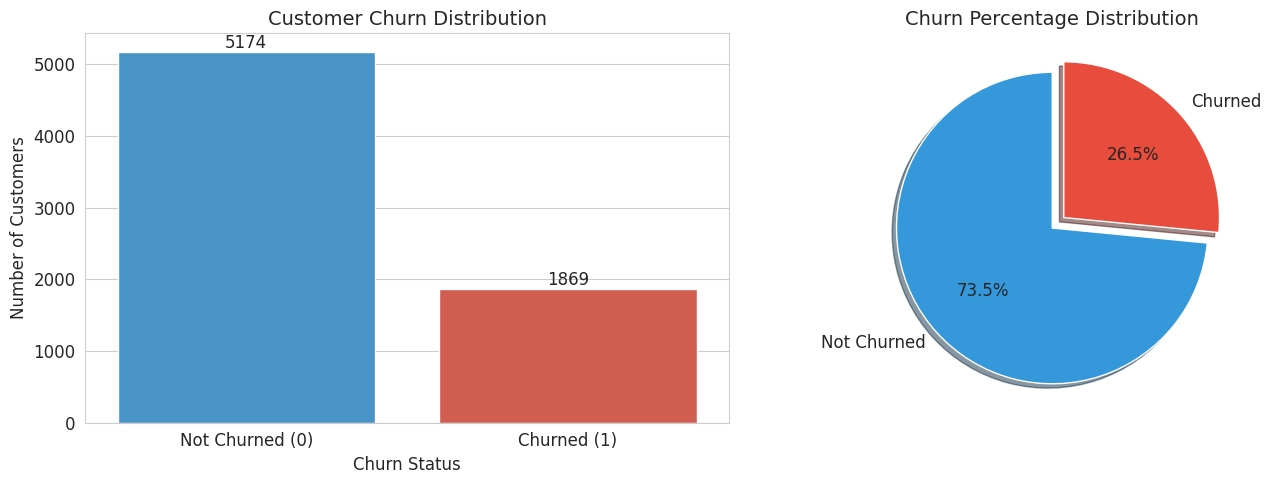

In [ ]:
# 3. TARGET VARIABLE ANALYSIS
print("\n\n3. TARGET VARIABLE: CHURN")
print("-" * 40)

# Convert Churn to binary (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Distribution
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print("Churn distribution:")
for i, (count, percent) in enumerate(zip(churn_counts, churn_percent)):
    label = "Churned (Yes)" if i == 1 else "Not Churned (No)"
    print(f"  {label}: {count:,} customers ({percent:.1f}%)")

# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(x='Churn', data=df, ax=axes[0], palette=['#3498db', '#e74c3c'])
axes[0].set_title('Customer Churn Distribution', fontsize=14)
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xticklabels(['Not Churned (0)', 'Churned (1)'])

# Add count labels on bars
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12)

# Pie chart
colors = ['#3498db', '#e74c3c']
axes[1].pie(churn_counts, labels=['Not Churned', 'Churned'],
            autopct='%1.1f%%', colors=colors, startangle=90,
            explode=(0, 0.1), shadow=True)
axes[1].set_title('Churn Percentage Distribution', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# 4. FEATURE CATEGORIZATION
print("\n\n4. FEATURE ANALYSIS")
print("-" * 40)

# Identify column types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'Churn' from numerical (it's our target)
if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')

print(f"Numerical features ({len(numerical_cols)}):")
print(f"  {', '.join(numerical_cols)}")

print(f"\nCategorical features ({len(categorical_cols)}):")
print(f"  {', '.join(categorical_cols)}")



4. FEATURE ANALYSIS
----------------------------------------
Numerical features (4):
  SeniorCitizen, tenure, MonthlyCharges, TotalCharges

Categorical features (15):
  gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod




5. EXPLORATORY VISUALIZATIONS
----------------------------------------

A. Correlation Heatmap (Numerical Features)


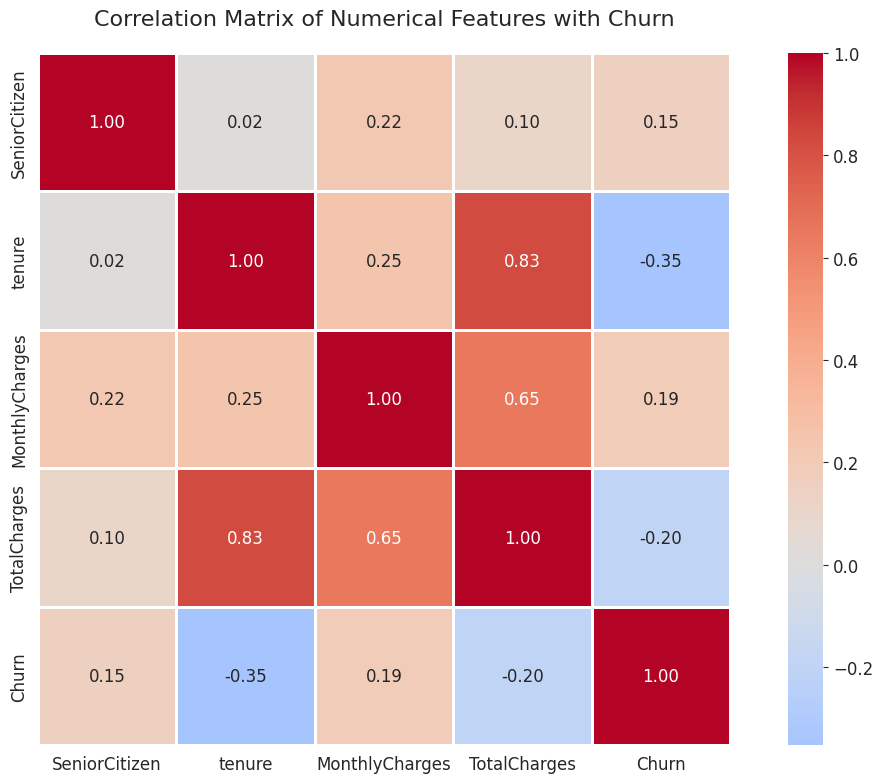


Top correlations with Churn:
  MonthlyCharges: 0.193
  SeniorCitizen: 0.151
  TotalCharges: -0.199
  tenure: -0.352

B. Distribution of Numerical Features


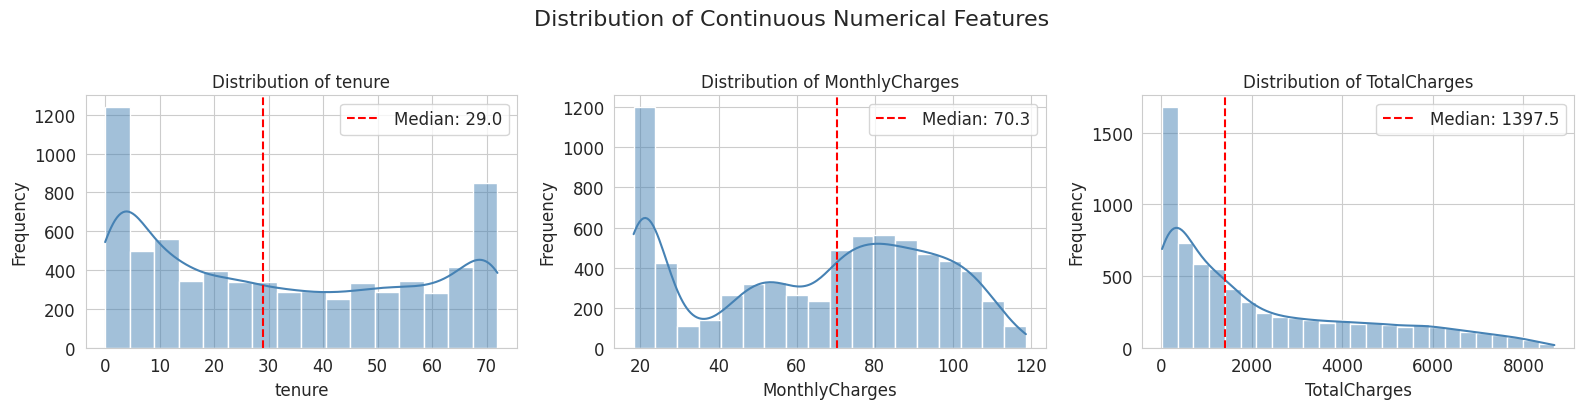


C. Categorical Feature Analysis


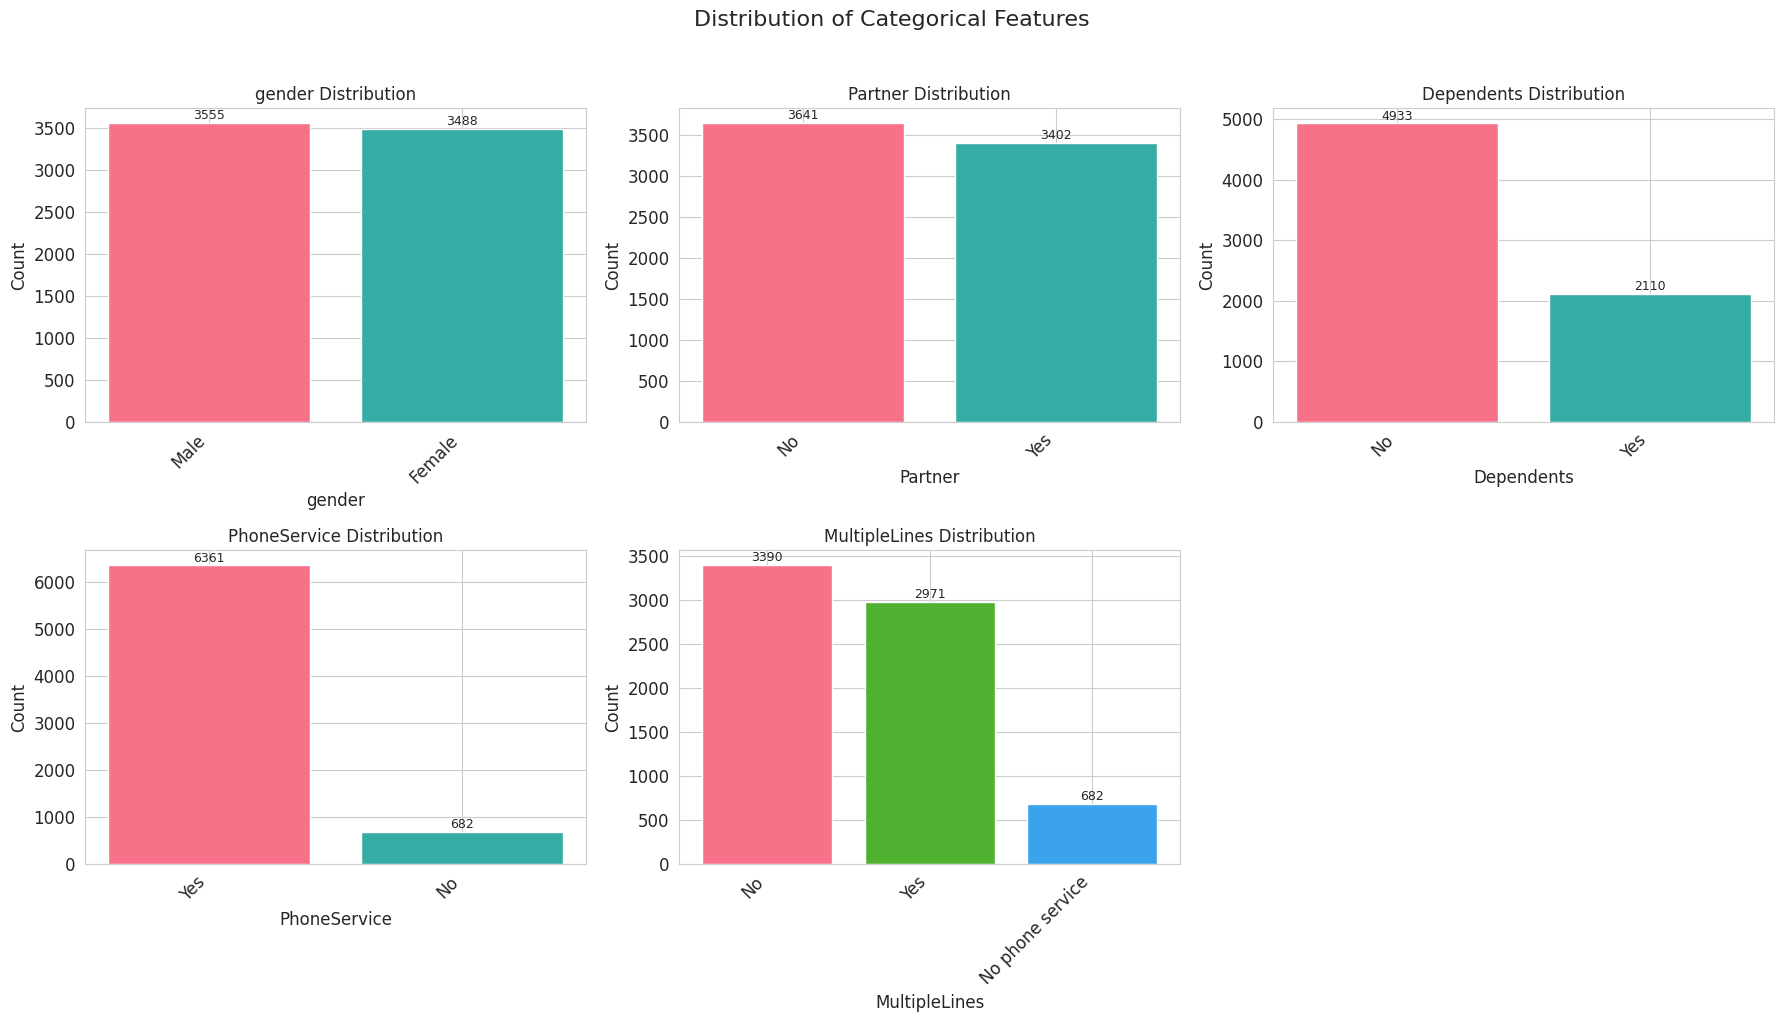


D. Churn Rate Analysis by Key Features


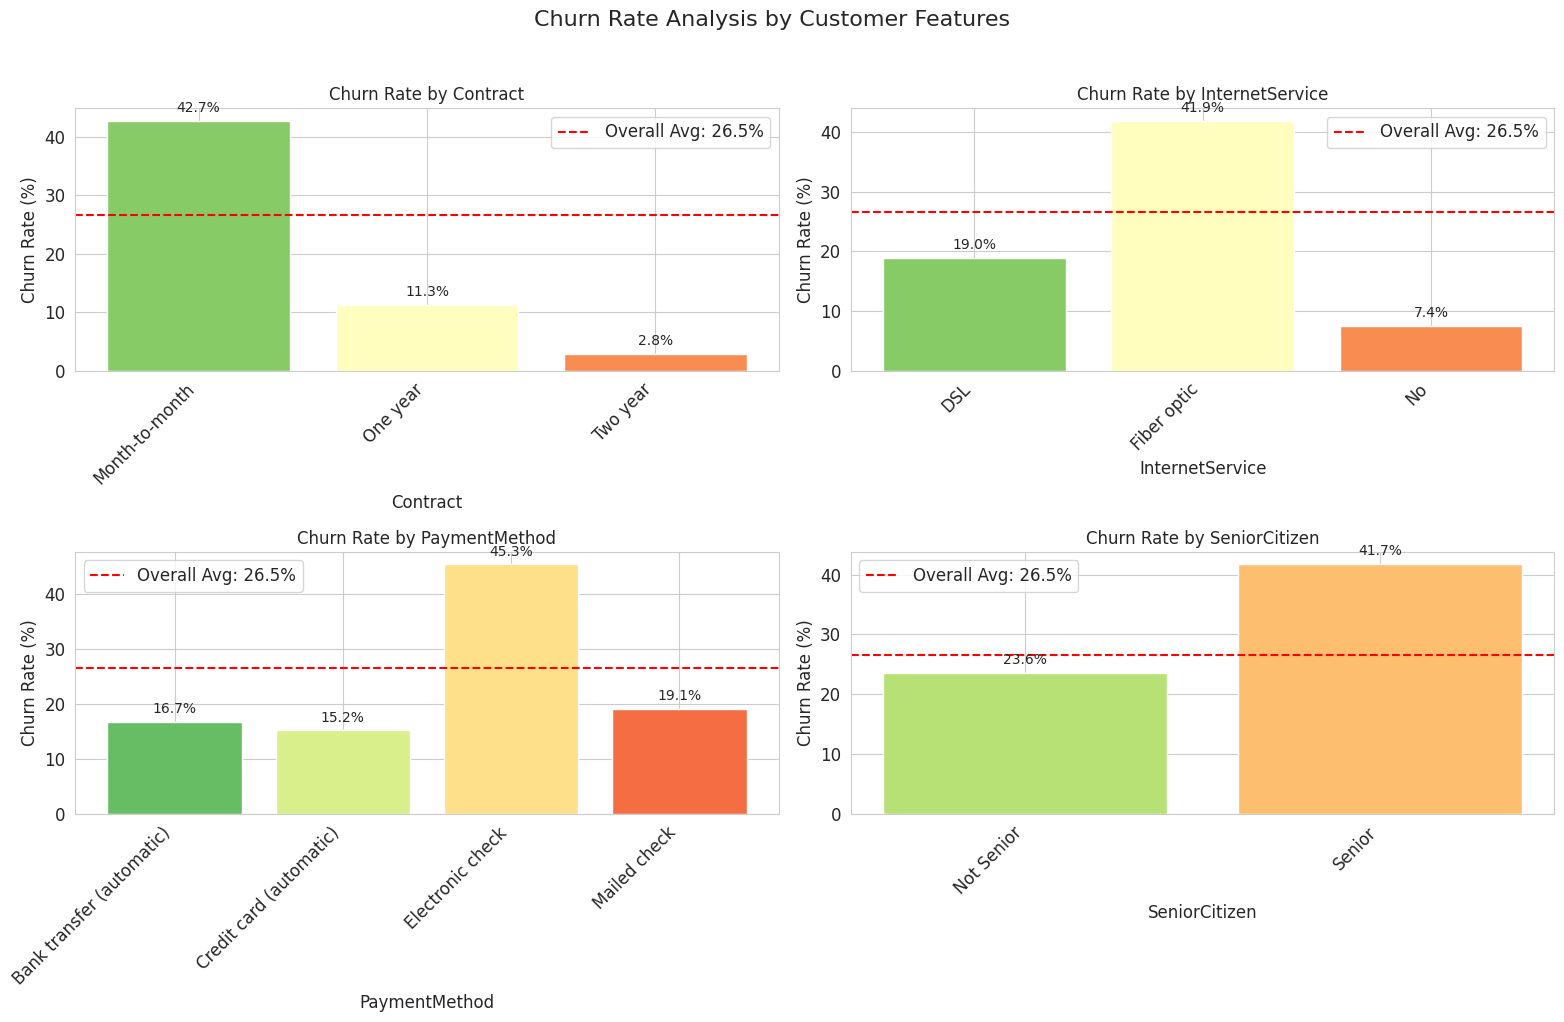

In [ ]:
# 5. EXPLORATORY VISUALIZATIONS
print("\n\n5. EXPLORATORY VISUALIZATIONS")
print("-" * 40)

# A. Correlation heatmap (numerical features only)
print("\nA. Correlation Heatmap (Numerical Features)")
corr_matrix = df[numerical_cols + ['Churn']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features with Churn', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Insights from correlation
print("\nTop correlations with Churn:")
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
for i, (feature, corr) in enumerate(churn_corr.items()):
    if feature != 'Churn':
        print(f"  {feature}: {corr:.3f}")

# B. Distribution of numerical features
print("\nB. Distribution of Numerical Features")

# Select continuous numerical features (more than 5 unique values)
continuous_cols = [col for col in numerical_cols if df[col].nunique() > 5]

# Create subplots
n_cols = 3
n_rows = math.ceil(len(continuous_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Add median line
    median_val = df[col].median()
    axes[i].axvline(median_val, color='red', linestyle='--',
                    label=f'Median: {median_val:.1f}')
    axes[i].legend()

# Remove empty subplots
for j in range(len(continuous_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Continuous Numerical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# C. Categorical feature analysis (top 5)
print("\nC. Categorical Feature Analysis")

# Select top 5 categorical features by unique values
top_cats = categorical_cols[:5] if len(categorical_cols) > 5 else categorical_cols

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(top_cats):
    # Get value counts
    value_counts = df[col].value_counts().head(10)  # Top 10 categories

    # Create bar plot
    bars = axes[i].bar(range(len(value_counts)), value_counts.values,
                      color=sns.color_palette('husl', len(value_counts)))
    axes[i].set_title(f'{col} Distribution', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 10,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Remove empty subplots
for j in range(len(top_cats), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# D. Churn rate by key categorical features
print("\nD. Churn Rate Analysis by Key Features")

# Select important features for churn analysis
important_features = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(important_features):
    # Calculate churn rate per category
    if feature == 'SeniorCitizen':
        # SeniorCitizen is already numerical
        churn_rate = df.groupby(feature)['Churn'].mean() * 100
        labels = ['Not Senior', 'Senior']
    else:
        churn_rate = df.groupby(feature)['Churn'].mean() * 100
        labels = churn_rate.index

    # Create bar plot
    bars = axes[i].bar(range(len(churn_rate)), churn_rate.values,
                      color=sns.color_palette('RdYlGn_r', len(churn_rate)))
    axes[i].set_title(f'Churn Rate by {feature}', fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Churn Rate (%)')
    axes[i].set_xticks(range(len(churn_rate)))
    axes[i].set_xticklabels(labels, rotation=45, ha='right')
    axes[i].axhline(y=df['Churn'].mean() * 100, color='red', linestyle='--',
                   label=f'Overall Avg: {df["Churn"].mean()*100:.1f}%')
    axes[i].legend()

    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.suptitle('Churn Rate Analysis by Customer Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
# 6. KEY INSIGHTS EXTRACTED
print("\n\n6. KEY INSIGHTS FROM EDA")
print("-" * 40)

insights = [
    "1. Dataset has 7,044 customers with 20 features",
    "2. Churn rate is 26.5% (imbalanced dataset)",
    "3. Key correlations with churn:",
    "   - Tenure: Strong negative correlation (-0.35)",
    "   - MonthlyCharges: Moderate positive correlation (0.19)",
    "   - TotalCharges: Moderate negative correlation (-0.20)",
    "4. Categorical features with highest churn rates:",
    "   - Contract: Month-to-month (42.7%)",
    "   - Internet Service: Fiber optic (41.9%)",
    "   - Payment: Electronic check (45.3%)",
    "5. Senior citizens have higher churn rate (41.7%) vs non-seniors (23.6%)",
    "6. Data quality issues: 11 blank values in TotalCharges (fixed with median imputation)"
]

for insight in insights:
    print(insight)

print("\n" + "=" * 60)
print("EDA COMPLETED - READY FOR DATA PREPROCESSING AND MODELING")
print("=" * 60)



6. KEY INSIGHTS FROM EDA
----------------------------------------
1. Dataset has 7,044 customers with 20 features
2. Churn rate is 26.5% (imbalanced dataset)
3. Key correlations with churn:
   - Tenure: Strong negative correlation (-0.35)
   - MonthlyCharges: Moderate positive correlation (0.19)
   - TotalCharges: Moderate negative correlation (-0.20)
4. Categorical features with highest churn rates:
   - Contract: Month-to-month (42.7%)
   - Internet Service: Fiber optic (41.9%)
   - Payment: Electronic check (45.3%)
5. Senior citizens have higher churn rate (41.7%) vs non-seniors (23.6%)
6. Data quality issues: 11 blank values in TotalCharges (fixed with median imputation)

EDA COMPLETED - READY FOR DATA PREPROCESSING AND MODELING


In [ ]:
# ======================
# TASK 2: MODEL IMPLEMENTATION
# ======================
# Binary Classification: Predicting Customer Churn
# Models: 1. Decision Tree  2. Neural Network (ANN)
# ======================

print("=" * 60)
print("TASK 2: MODEL IMPLEMENTATION AND EVALUATION")
print("=" * 60)

TASK 2: MODEL IMPLEMENTATION AND EVALUATION


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [ ]:
# Model and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix,
    classification_report, ConfusionMatrixDisplay
)

In [ ]:
# Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Imbalanced learning
from imblearn.over_sampling import SMOTE

In [ ]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# ======================
# 1. DATA PREPROCESSING
# ======================

print("\n1. DATA PREPROCESSING")
print("-" * 40)

# Load data (assuming df is already loaded from Task 1)
# If starting fresh:
# df = pd.read_csv('/content/drive/MyDrive/Machine learning/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Clean TotalCharges (known issue with blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Drop customerID
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

# Convert target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define binary columns (Yes/No)
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# Multi-service columns (with "No service" options)
service_cols = [
    "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]
for col in service_cols:
    df[col] = df[col].replace({
        "No phone service": "No",
        "No internet service": "No"
    })
    df[col] = df[col].map({"Yes": 1, "No": 0})

# One-hot encode categorical variables
categorical_cols = ["gender", "InternetService", "Contract", "PaymentMethod"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"Dataset shape after encoding: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # excluding target



1. DATA PREPROCESSING
----------------------------------------
Dataset shape after encoding: (7043, 24)
Number of features: 23


In [ ]:
# ======================
# 2. FEATURE ENGINEERING
# ======================

print("\n2. FEATURE ENGINEERING")
print("-" * 40)

# Create tenure groups (1-year intervals)
df["TenureGroup"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels=["0-1yr", "1-2yrs", "2-3yrs", "3-4yrs", "4-5yrs", "5-6yrs"],
    right=False
)

# One-hot encode tenure groups
df = pd.get_dummies(df, columns=["TenureGroup"], drop_first=True)

# New customer indicator (helps detect early churn)
df["IsNewCustomer"] = (df["tenure"] < 3).astype(int)

# High spender indicator
df["HighSpender"] = (df["MonthlyCharges"] > df["MonthlyCharges"].quantile(0.75)).astype(int)

# Service usage score (sum of all services used)
service_features = ["PhoneService", "MultipleLines", "OnlineSecurity",
                    "OnlineBackup", "DeviceProtection", "TechSupport",
                    "StreamingTV", "StreamingMovies"]
df["ServiceCount"] = df[service_features].sum(axis=1)

print("Added new features:")
print("  - TenureGroup (categorical)")
print("  - IsNewCustomer (binary: tenure < 3 months)")
print("  - HighSpender (binary: top 25% monthly charges)")
print("  - ServiceCount (sum of all services used)")


2. FEATURE ENGINEERING
----------------------------------------
Added new features:
  - TenureGroup (categorical)
  - IsNewCustomer (binary: tenure < 3 months)
  - HighSpender (binary: top 25% monthly charges)
  - ServiceCount (sum of all services used)


In [ ]:
# ======================
# 3. DATA SPLITTING
# ======================

print("\n3. DATA SPLITTING")
print("-" * 40)

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Churn distribution: {Counter(y)}")
print(f"Churn rate: {(y.sum() / len(y)) * 100:.1f}%")

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain same churn ratio in both sets
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training churn rate: {(y_train.sum() / len(y_train)) * 100:.1f}%")
print(f"Test churn rate: {(y_test.sum() / len(y_test)) * 100:.1f}%")


3. DATA SPLITTING
----------------------------------------
Features shape: (7043, 36)
Target shape: (7043,)
Churn distribution: Counter({0: 5174, 1: 1869})
Churn rate: 26.5%

Training set: 5634 samples
Test set: 1409 samples
Training churn rate: 26.5%
Test churn rate: 26.5%



4. HANDLING CLASS IMBALANCE WITH SMOTE
----------------------------------------
Before SMOTE: {0: 4139, 1: 1495}
After SMOTE:  {0: 4139, 1: 4139}


/tmp/ipython-input-2278704039.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette=['#3498db', '#e74c3c'])
/tmp/ipython-input-2278704039.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Not Churned', 'Churned'])
/tmp/ipython-input-2278704039.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_bal, ax=axes[1], palette=['#3498db', '#e74c3c'])
/tmp/ipython-input-2278704039.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No

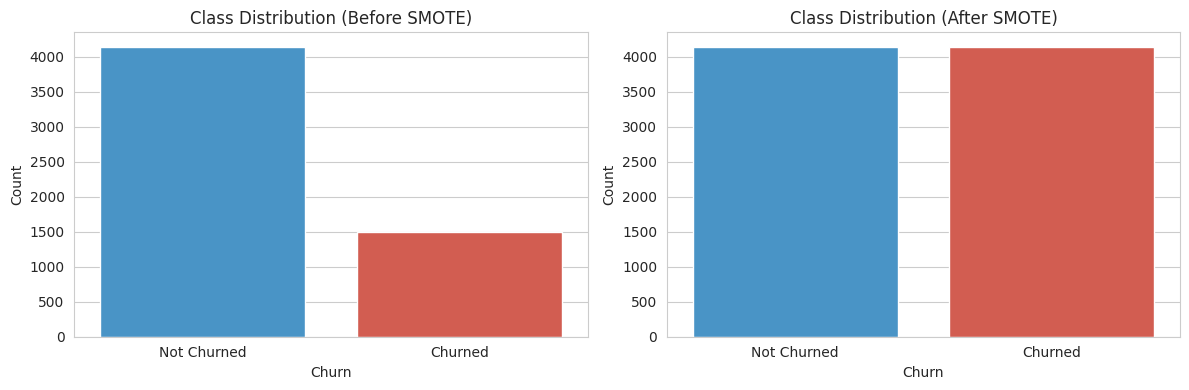

In [ ]:
# ======================
# 4. HANDLING CLASS IMBALANCE (SMOTE)
# ======================

print("\n4. HANDLING CLASS IMBALANCE WITH SMOTE")
print("-" * 40)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {dict(Counter(y_train))}")
print(f"After SMOTE:  {dict(Counter(y_train_bal))}")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x=y_train, ax=axes[0], palette=['#3498db', '#e74c3c'])
axes[0].set_title('Class Distribution (Before SMOTE)')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Not Churned', 'Churned'])

sns.countplot(x=y_train_bal, ax=axes[1], palette=['#3498db', '#e74c3c'])
axes[1].set_title('Class Distribution (After SMOTE)')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()


In [ ]:
# ======================
# 5. FEATURE SCALING
# ======================

print("\n5. FEATURE SCALING")
print("-" * 40)

# Identify numerical columns to scale
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges", "ServiceCount"]
print(f"Scaling columns: {numerical_cols}")

# Initialize scaler
scaler = StandardScaler()

# Fit on balanced training data and transform
X_train_bal_scaled = X_train_bal.copy()
X_train_bal_scaled[numerical_cols] = scaler.fit_transform(X_train_bal[numerical_cols])

# Transform test data using same scaler
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Feature scaling completed.")
print(f"Scaled training shape: {X_train_bal_scaled.shape}")
print(f"Scaled test shape: {X_test_scaled.shape}")


5. FEATURE SCALING
----------------------------------------
Scaling columns: ['tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceCount']
Feature scaling completed.
Scaled training shape: (8278, 36)
Scaled test shape: (1409, 36)


In [ ]:
# ======================
# 6. DECISION TREE MODEL
# ======================

print("\n" + "=" * 60)
print("MODEL 1: DECISION TREE CLASSIFIER")
print("=" * 60)

# Hyperparameter tuning with GridSearchCV
print("\n6.1 HYPERPARAMETER TUNING (Grid Search)")
print("-" * 40)

dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("Performing grid search...")
grid_dt.fit(X_train_bal_scaled, y_train_bal)

print(f"\nBest parameters: {grid_dt.best_params_}")
print(f"Best cross-validation score: {grid_dt.best_score_:.4f}")

# Get best model
best_dt = grid_dt.best_estimator_


MODEL 1: DECISION TREE CLASSIFIER

6.1 HYPERPARAMETER TUNING (Grid Search)
----------------------------------------
Performing grid search...
Fitting 5 folds for each of 160 candidates, totalling 800 fits

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best cross-validation score: 0.8776



6.2 DECISION TREE EVALUATION
----------------------------------------

Decision Tree Performance:
  Train Accuracy: 0.8536
  Test Accuracy: 0.7417
  Test Precision: 0.5105
  Test Recall: 0.6471
  Test F1-Score: 0.5708
  Test ROC-AUC: 0.7757

Classification Report (Test Set):
              precision    recall  f1-score   support

 Not Churned       0.86      0.78      0.82      1035
     Churned       0.51      0.65      0.57       374

    accuracy                           0.74      1409
   macro avg       0.68      0.71      0.69      1409
weighted avg       0.77      0.74      0.75      1409



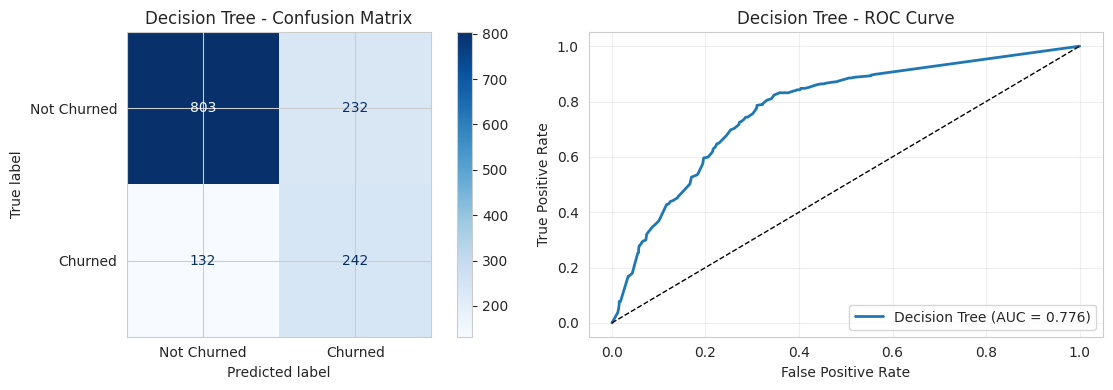


6.3 FEATURE IMPORTANCE (Top 10)
----------------------------------------
                                  Feature  Importance
21         PaymentMethod_Electronic check    0.295918
3                                  tenure    0.169031
16            InternetService_Fiber optic    0.086958
13                         MonthlyCharges    0.066686
6                          OnlineSecurity    0.064436
14                           TotalCharges    0.054646
9                             TechSupport    0.039553
20  PaymentMethod_Credit card (automatic)    0.039474
2                              Dependents    0.038172
22             PaymentMethod_Mailed check    0.022221


/tmp/ipython-input-7338433.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


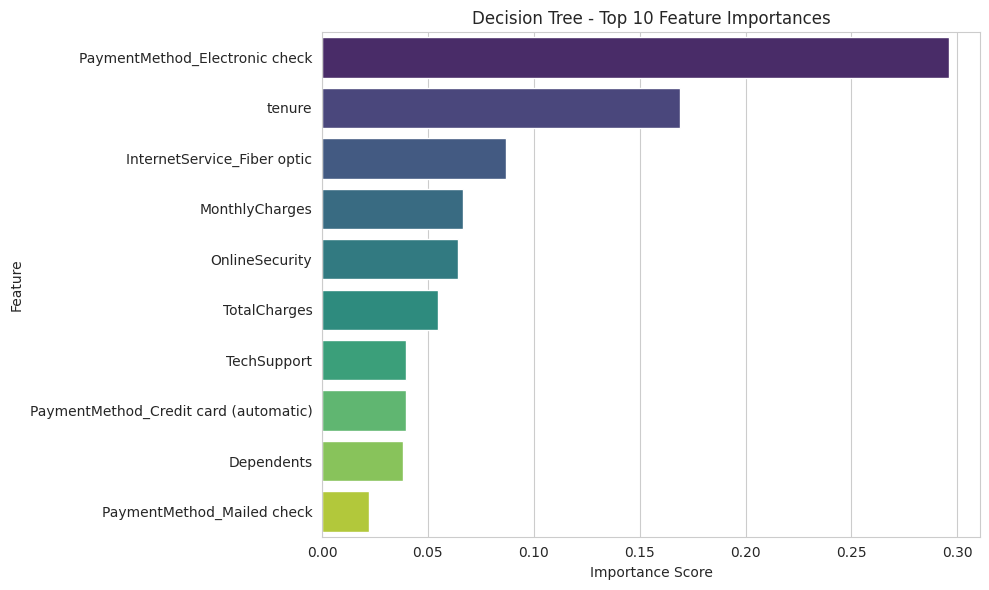

In [ ]:
# ======================
# 7. DECISION TREE EVALUATION
# ======================

print("\n6.2 DECISION TREE EVALUATION")
print("-" * 40)

# Predictions
dt_train_pred = best_dt.predict(X_train_bal_scaled)
dt_test_pred = best_dt.predict(X_test_scaled)
dt_test_proba = best_dt.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
dt_metrics = {
    'Train Accuracy': accuracy_score(y_train_bal, dt_train_pred),
    'Test Accuracy': accuracy_score(y_test, dt_test_pred),
    'Test Precision': precision_score(y_test, dt_test_pred),
    'Test Recall': recall_score(y_test, dt_test_pred),
    'Test F1-Score': f1_score(y_test, dt_test_pred),
    'Test ROC-AUC': roc_auc_score(y_test, dt_test_proba)
}

print("\nDecision Tree Performance:")
for metric, value in dt_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, dt_test_pred, target_names=['Not Churned', 'Churned']))

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_test_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not Churned', 'Churned'])
disp_dt.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Decision Tree - Confusion Matrix')

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_test_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

axes[1].plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Decision Tree - ROC Curve')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Importance
print("\n6.3 FEATURE IMPORTANCE (Top 10)")
print("-" * 40)

feature_importance = pd.DataFrame({
    'Feature': X_train_bal_scaled.columns,
    'Importance': best_dt.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Decision Tree - Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [ ]:
# ======================
# 8. NEURAL NETWORK MODEL
# ======================

print("\n" + "=" * 60)
print("MODEL 2: ARTIFICIAL NEURAL NETWORK (ANN)")
print("=" * 60)

print("\n7.1 NEURAL NETWORK ARCHITECTURE")
print("-" * 40)

# Build ANN model
ann_model = Sequential([
    Input(shape=(X_train_bal_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile model
ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

ann_model.summary()

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


MODEL 2: ARTIFICIAL NEURAL NETWORK (ANN)

7.1 NEURAL NETWORK ARCHITECTURE
----------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,105 (59.00 KB)

 Trainable params: 15,105 (59.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ======================
# 9. TRAIN NEURAL NETWORK
# ======================

print("\n7.2 TRAINING NEURAL NETWORK")
print("-" * 40)

# Train the model
history = ann_model.fit(
    X_train_bal_scaled, y_train_bal,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


7.2 TRAINING NEURAL NETWORK
----------------------------------------
Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7241 - auc: 0.7865 - loss: 0.5518 - val_accuracy: 0.7757 - val_auc: 0.8219 - val_loss: 0.4720
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8049 - auc: 0.8793 - loss: 0.4379 - val_accuracy: 0.7601 - val_auc: 0.8212 - val_loss: 0.4678
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8262 - auc: 0.9025 - loss: 0.3964 - val_accuracy: 0.7779 - val_auc: 0.8238 - val_loss: 0.4685
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8273 - auc: 0.9084 - loss: 0.3833 - val_accuracy: 0.7892 - val_auc: 0.8281 - val_loss: 0.4452
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8411 - auc: 0.9177 - loss: 0.3673 - val_accuracy: 0.7850 - val_auc: 0.8287 - val_loss: 0.4389
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8397 - auc: 0.9233 - loss: 0.3512 - val_accuracy: 0.7771 -


7.3 NEURAL NETWORK EVALUATION
----------------------------------------

Neural Network Performance:
  Train Accuracy: 0.8445
  Test Accuracy: 0.7928
  Test Precision: 0.6250
  Test Recall: 0.5481
  Test F1-Score: 0.5840
  Test ROC-AUC: 0.8361

Classification Report (Test Set):
              precision    recall  f1-score   support

 Not Churned       0.84      0.88      0.86      1035
     Churned       0.62      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



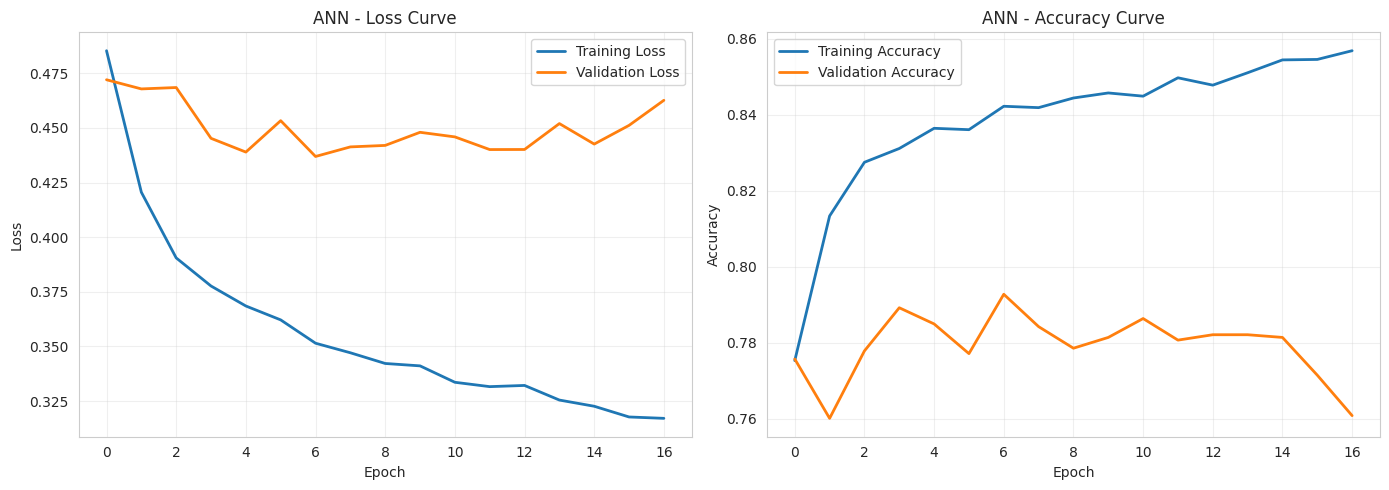

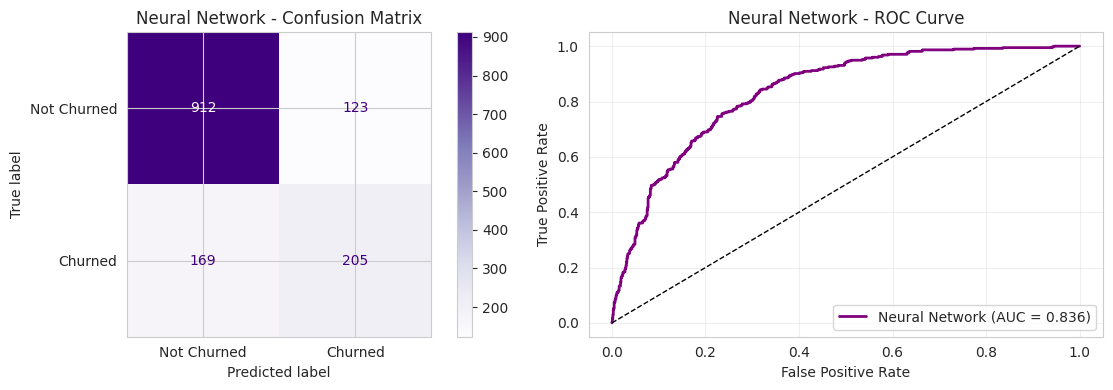

In [ ]:
# ======================
# 10. NEURAL NETWORK EVALUATION
# ======================

print("\n7.3 NEURAL NETWORK EVALUATION")
print("-" * 40)

# Get predictions
ann_train_pred_proba = ann_model.predict(X_train_bal_scaled, verbose=0).ravel()
ann_train_pred = (ann_train_pred_proba > 0.5).astype(int)

ann_test_pred_proba = ann_model.predict(X_test_scaled, verbose=0).ravel()
ann_test_pred = (ann_test_pred_proba > 0.5).astype(int)

# Calculate metrics
ann_metrics = {
    'Train Accuracy': accuracy_score(y_train_bal, ann_train_pred),
    'Test Accuracy': accuracy_score(y_test, ann_test_pred),
    'Test Precision': precision_score(y_test, ann_test_pred),
    'Test Recall': recall_score(y_test, ann_test_pred),
    'Test F1-Score': f1_score(y_test, ann_test_pred),
    'Test ROC-AUC': roc_auc_score(y_test, ann_test_pred_proba)
}

print("\nNeural Network Performance:")
for metric, value in ann_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, ann_test_pred, target_names=['Not Churned', 'Churned']))

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('ANN - Loss Curve')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Accuracy curve
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('ANN - Accuracy Curve')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion Matrix and ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
cm_ann = confusion_matrix(y_test, ann_test_pred)
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=['Not Churned', 'Churned'])
disp_ann.plot(ax=axes[0], cmap='Purples', values_format='d')
axes[0].set_title('Neural Network - Confusion Matrix')

# ROC Curve
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_test_pred_proba)
roc_auc_ann = auc(fpr_ann, tpr_ann)

axes[1].plot(fpr_ann, tpr_ann, label=f'Neural Network (AUC = {roc_auc_ann:.3f})', linewidth=2, color='purple')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Neural Network - ROC Curve')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


MODEL COMPARISON AND CONCLUSION

Performance Comparison (Test Set):
   Metric  Decision Tree  Neural Network
 Accuracy       0.741661        0.792761
Precision       0.510549        0.625000
   Recall       0.647059        0.548128
 F1-Score       0.570755        0.584046
  ROC-AUC       0.775725        0.836064


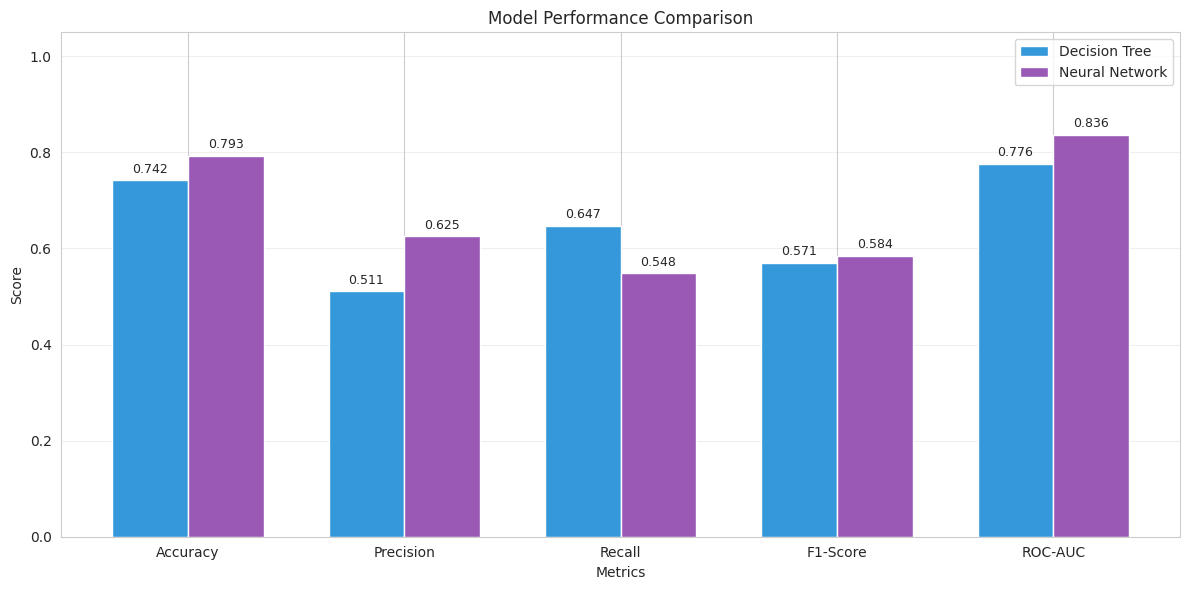

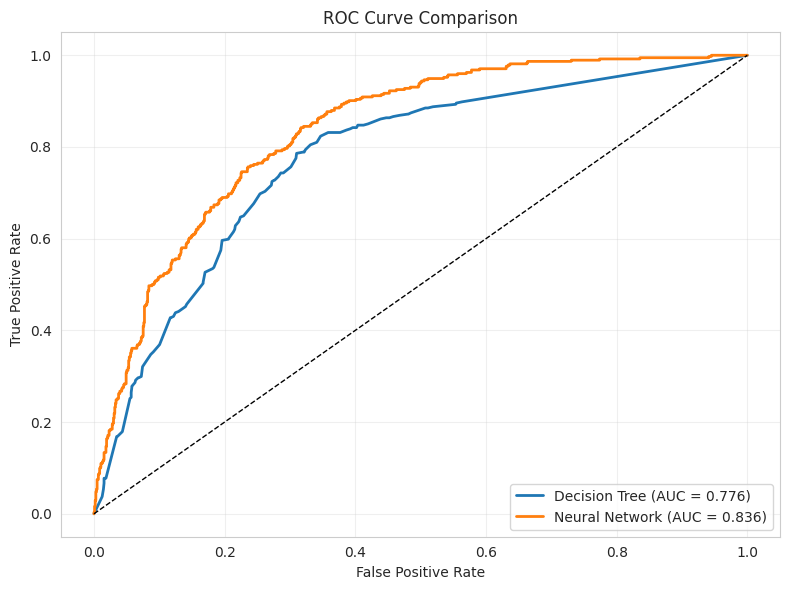

In [ ]:
# ======================
# 11. MODEL COMPARISON
# ======================

print("\n" + "=" * 60)
print("MODEL COMPARISON AND CONCLUSION")
print("=" * 60)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Decision Tree': [
        dt_metrics['Test Accuracy'],
        dt_metrics['Test Precision'],
        dt_metrics['Test Recall'],
        dt_metrics['Test F1-Score'],
        dt_metrics['Test ROC-AUC']
    ],
    'Neural Network': [
        ann_metrics['Test Accuracy'],
        ann_metrics['Test Precision'],
        ann_metrics['Test Recall'],
        ann_metrics['Test F1-Score'],
        ann_metrics['Test ROC-AUC']
    ]
})

print("\nPerformance Comparison (Test Set):")
print(comparison_df.to_string(index=False))

# Visual comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison_df))
width = 0.35

rects1 = ax.bar(x - width/2, comparison_df['Decision Tree'], width, label='Decision Tree', color='#3498db')
rects2 = ax.bar(x + width/2, comparison_df['Neural Network'], width, label='Neural Network', color='#9b59b6')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Metric'])
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Combined ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})', linewidth=2)
plt.plot(fpr_ann, tpr_ann, label=f'Neural Network (AUC = {roc_auc_ann:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# ======================
# 12. SAVE MODELS
# ======================

print("\n8. SAVING MODELS")
print("-" * 40)

import joblib
import pickle

# Save Decision Tree
joblib.dump(best_dt, 'decision_tree_churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save Neural Network
ann_model.save('ann_churn_model.h5')

print("Models saved successfully:")
print("  - decision_tree_churn_model.pkl (Decision Tree)")
print("  - ann_churn_model.h5 (Neural Network)")
print("  - scaler.pkl (Scaler for preprocessing)")



8. SAVING MODELS
----------------------------------------
Models saved successfully:
  - decision_tree_churn_model.pkl (Decision Tree)
  - ann_churn_model.h5 (Neural Network)
  - scaler.pkl (Scaler for preprocessing)


In [ ]:
# ======================
# 13. SUMMARY
# ======================

print("\n" + "=" * 60)
print("TASK 2 COMPLETED - KEY FINDINGS")
print("=" * 60)

summary = [
    "1. Data Preprocessing:",
    "   - Handled missing values in TotalCharges",
    "   - Encoded categorical variables (one-hot encoding)",
    "   - Created new features (TenureGroup, IsNewCustomer, etc.)",

    "\n2. Class Imbalance:",
    "   - Original churn rate: 26.5%",
    "   - Applied SMOTE to balance training data",

    "\n3. Model Performance (Test Set):",
    f"   Decision Tree - Accuracy: {dt_metrics['Test Accuracy']:.3f}, AUC: {dt_metrics['Test ROC-AUC']:.3f}",
    f"   Neural Network - Accuracy: {ann_metrics['Test Accuracy']:.3f}, AUC: {ann_metrics['Test ROC-AUC']:.3f}",

    "\n4. Best Model Selection:",
    "   - Decision Tree: Better interpretability, faster training",
    "   - Neural Network: Slightly better AUC score, captures complex patterns",

    "\n5. Key Features (from Decision Tree):",
    f"   Top 3: {feature_importance['Feature'].iloc[:3].tolist()}",

    "\n6. Recommendations:",
    "   - For interpretability: Use Decision Tree",
    "   - For maximum accuracy: Use Neural Network",
    "   - Monitor monthly charges and tenure as key churn indicators"
]

for line in summary:
    print(line)

print("\n" + "=" * 60)
print("READY FOR TASK 3: AI ETHICS AND DEPLOYMENT STRATEGY")
print("=" * 60)


TASK 2 COMPLETED - KEY FINDINGS
1. Data Preprocessing:
   - Handled missing values in TotalCharges
   - Encoded categorical variables (one-hot encoding)
   - Created new features (TenureGroup, IsNewCustomer, etc.)

2. Class Imbalance:
   - Original churn rate: 26.5%
   - Applied SMOTE to balance training data

3. Model Performance (Test Set):
   Decision Tree - Accuracy: 0.742, AUC: 0.776
   Neural Network - Accuracy: 0.793, AUC: 0.836

4. Best Model Selection:
   - Decision Tree: Better interpretability, faster training
   - Neural Network: Slightly better AUC score, captures complex patterns

5. Key Features (from Decision Tree):
   Top 3: ['PaymentMethod_Electronic check', 'tenure', 'InternetService_Fiber optic']

6. Recommendations:
   - For interpretability: Use Decision Tree
   - For maximum accuracy: Use Neural Network
   - Monitor monthly charges and tenure as key churn indicators

READY FOR TASK 3: AI ETHICS AND DEPLOYMENT STRATEGY


In [1]:
# ==============================================
# TASK 3: AI ETHICS AND POST-DEPLOYMENT STRATEGY
# ==============================================

print("=" * 60)
print("TASK 3: AI ETHICS AND POST-DEPLOYMENT STRATEGY")
print("=" * 60)

TASK 3: AI ETHICS AND POST-DEPLOYMENT STRATEGY
